# Статистика, прикладной поток
## Практическое задание 4

В данном задании вы потренируетесь работать с библиотекой pandas, посмотрите на свойства робастных оценок, а также реализуете приближенный поиск оценок максимального правдоподобия.

**Правила:**

* Дедлайн **5 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[applied] Фамилия Имя - задание 4"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 -  20 баллов **O3**
* Задача 2 -  7 баллов **O3**
* Задача 3 -  5 баллов **O3**
* Задача 4 -  15 баллов **O2**
* Задача 5 -  15 баллов **O3**
* Задача 6 -  5 баллов **O3**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

__________________
### Задача 1. Yelp

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Задача:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [3]:
companies = pd.read_csv("data/yelp_business.csv")
companies.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [4]:
top_cities = companies.groupby(by='city')['city'].count().sort_values(ascending=False).head()
N = top_cities.keys()[0]
top_cities

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

In [5]:
user_iduser_iduser_idN_info = companies[companies.city==N]
X = N_info.longitude
Y = N_info.latitude

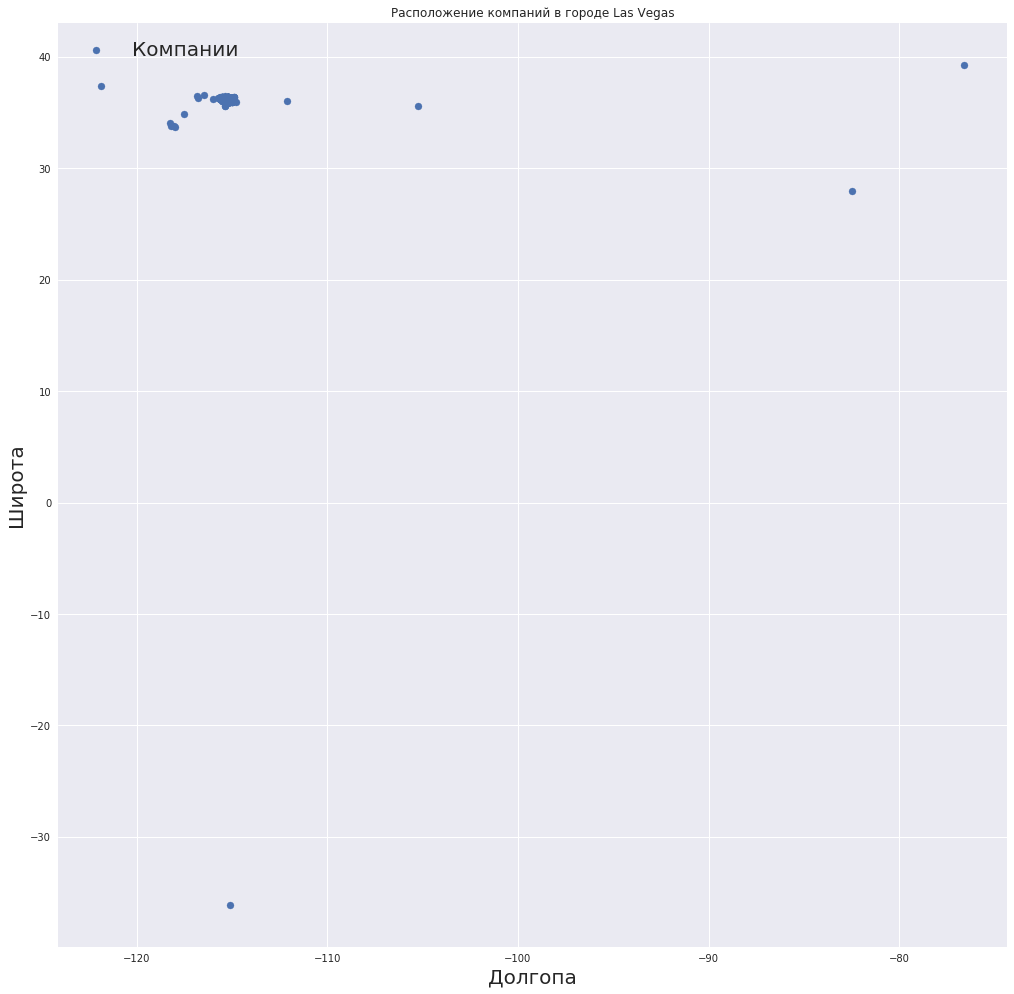

In [6]:
plt.figure(figsize=(17, 17))
plt.xlabel('Долгопа', fontsize=20)
plt.ylabel('Широта', fontsize=20)
plt.scatter(X, Y, label='Компании')

plt.legend(fontsize = 20)
plt.title('Расположение компаний в городе {}'.format(N))
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

При желании вы можете разобраться с тем, как автоматически подгружать карту города в качестве фона графика.

In [7]:
longitude_lims = [-115.4, -115]
latitude_lims = [35.9, 36.4]

def set_figure():
    plt.figure(figsize=(17, 17))
    plt.xlabel('Долгопа', fontsize=20)
    plt.ylabel('Широта', fontsize=20)
    plt.xlim(*longitude_lims)
    plt.ylim(*latitude_lims)

def draw_figure(title):
    plt.legend(fontsize = 20)
    plt.title(title)
    plt.show()

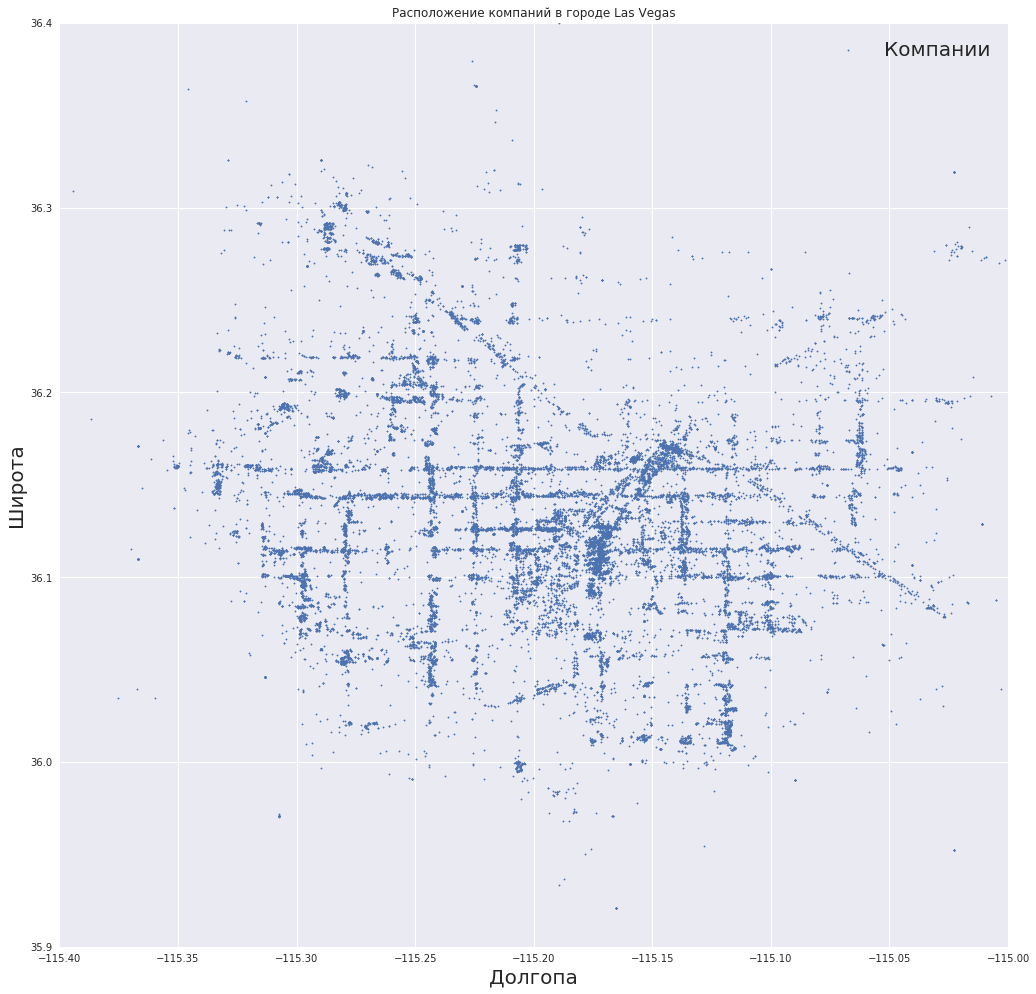

In [8]:
latitude_lims = [35.9, 36.4]
longitude_lims = [-115.4, -115]

set_figure()
plt.scatter(X, Y, label='Компании', s=2)

draw_figure('Расположение компаний в городе {}'.format(N))

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [9]:
reviews = pd.read_csv('data/yelp_review.csv')
reviews.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города N.
Для этого воспользуйтесь функцией `np.in1d(x, y)`, которая вернет массив того же размера, что и `x`, а на $i$-м месте будет `True`, если элемент `x[i]` встречается в `y`.

*Внимание!* Такая операция может выполняться довольно долго. После выполнения операции можно сохранить ее результат в файл, чтобы в дальнейшем не выполнять ее заново.

In [166]:
%%time
# id компаний из города с самым большим числом компаний 
companies_from_N = np.array(N_info['business_id'])
# Только id из оценок
companies_id = np.array(reviews['business_id'])
# только оцениваемые компании, для оптимизации поиска
unique_companies_id = np.unique(companies_id)

# проверка уникальных оценок на принадлежность городу N
unique_flags = np.in1d(unique_companies_id, companies_from_N)
unique_reviews_N = unique_companies_id[unique_flags]

# Выбор только подходящих оценок
flags = np.in1d(companies_id, unique_reviews_N)
reviews_N = reviews.loc[flags]
# Сохраняем результат
reviews_N.to_csv("data/reduced_review.csv")
print(len(reviews_N))

1604227
CPU times: user 1h 15min 56s, sys: 1.36 s, total: 1h 15min 58s
Wall time: 1h 15min 57s


In [10]:
reviews_N = pd.read_csv("data/reduced_review.csv")
reviews_N = reviews_N[['business_id', 'stars']]
print(len(reviews_N))
reviews_N.head()

1604227


,business_id,stars
0,8QWPlVQ6D-OExqXoaD2Z1g,5
1,pLZ9oZM8c6MNbRlg06lBPg,1
2,6Q7-wkCPc1KF75jZLOTcMw,2
3,9Jc3W0aR9Xf2gcHI0rEXsw,1
4,xVEtGucSRLk5pxxN0t4i6g,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [11]:
review_statistics = reviews_N.groupby(by='business_id').aggregate([np.mean, np.size])
review_statistics.head()

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [12]:
review_statistics.columns = ['stars', 'count']
review_statistics.head()

,stars,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [13]:
N_info = companies[companies.city==N]
N_info = N_info.set_index('business_id')
N_info.head()

reviews_location = N_info.join(review_statistics)
reviews_location = reviews_location[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
reviews_location.head()

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

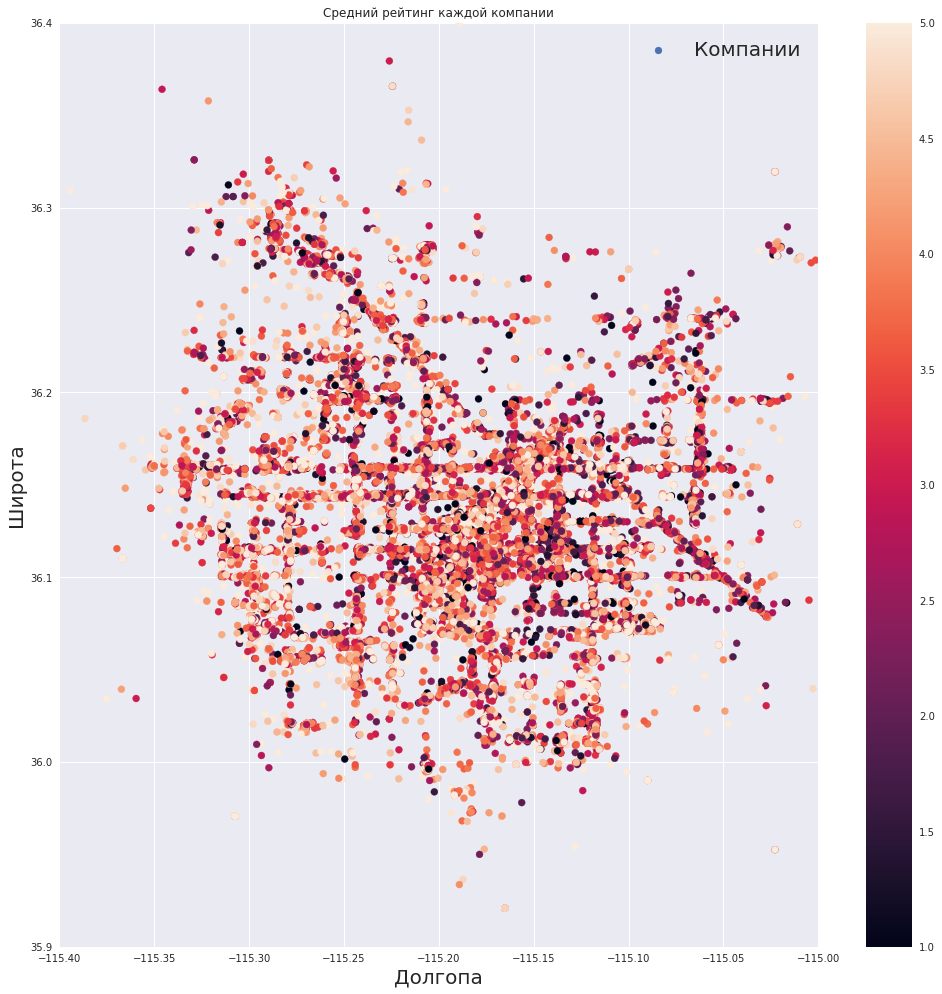

In [14]:
X = reviews_location.longitude
Y = reviews_location.latitude
C = reviews_location.stars

set_figure()

sc = plt.scatter(X, Y, c=C, label='Компании')
plt.colorbar(sc)

draw_figure('Средний рейтинг каждой компании')

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [15]:
def round_to_region(coordinates):
    return np.round(coordinates*4, decimals=1)*0.25

# Это строчка просто для создания копии reviews_location
reviews_regions = reviews_location.loc[reviews_location['count'] > 0]

reviews_regions.latitude = round_to_region(reviews_regions.latitude)
reviews_regions.longitude = round_to_region(reviews_regions.longitude)
reviews_regions.head()

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.200,-115.275,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.200,-115.250,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

No handles with labels found to put in legend.


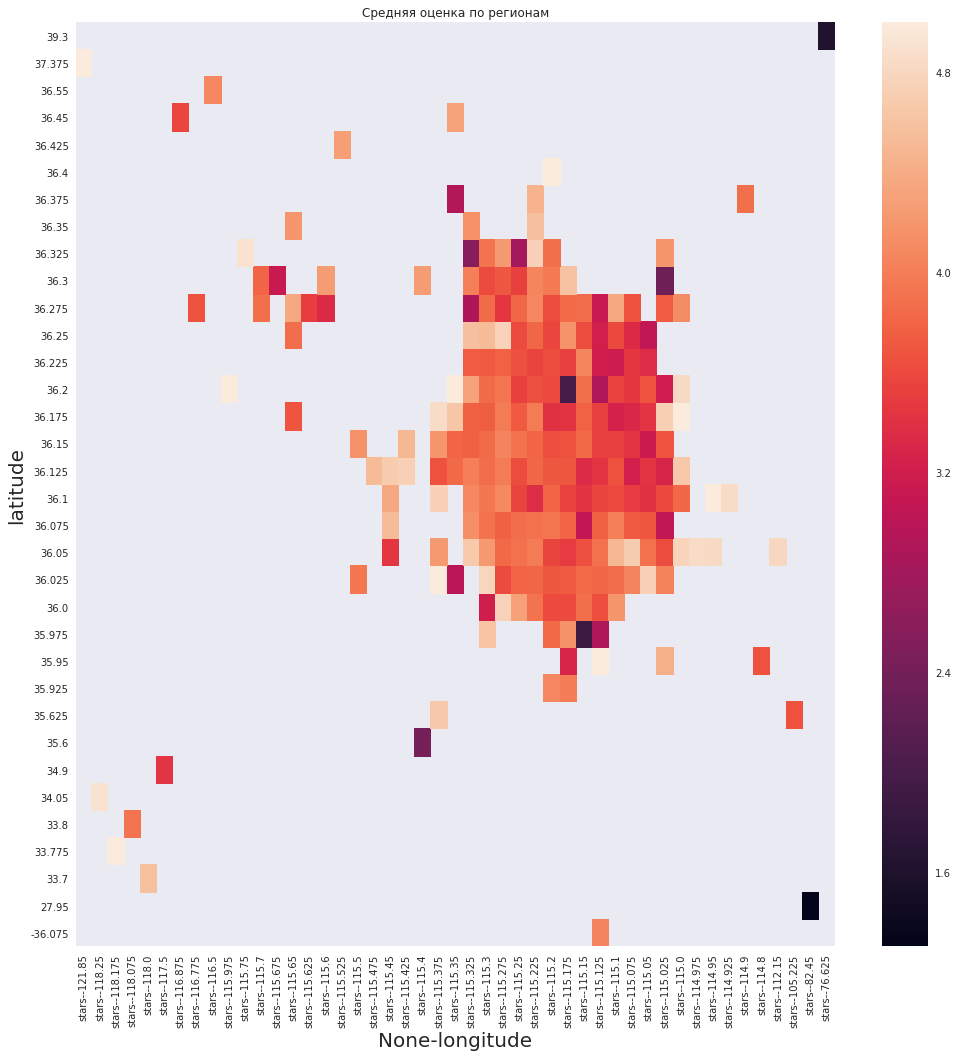

In [16]:
regions = pd.pivot_table(reviews_regions, values=['stars'],
                          index=['latitude'], columns=['longitude'], 
                          aggfunc=np.mean)

set_figure()
ax = sns.heatmap(regions)
ax.invert_yaxis()

draw_figure('Средняя оценка по регионам')

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 
* Первый недостаток существенный, так как график никак не отображает количество компаний в регионе и может сформироваться ложное представление о регионе по маленьким компаниям с маленьнким числом отзывов
* И соответственно из-за наличия компаний с критично маленьким и экстримально большим рейтингом, шкала растягивается, и может показаться, что оценки во всех регионах довольно сильно отличаются

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

No handles with labels found to put in legend.


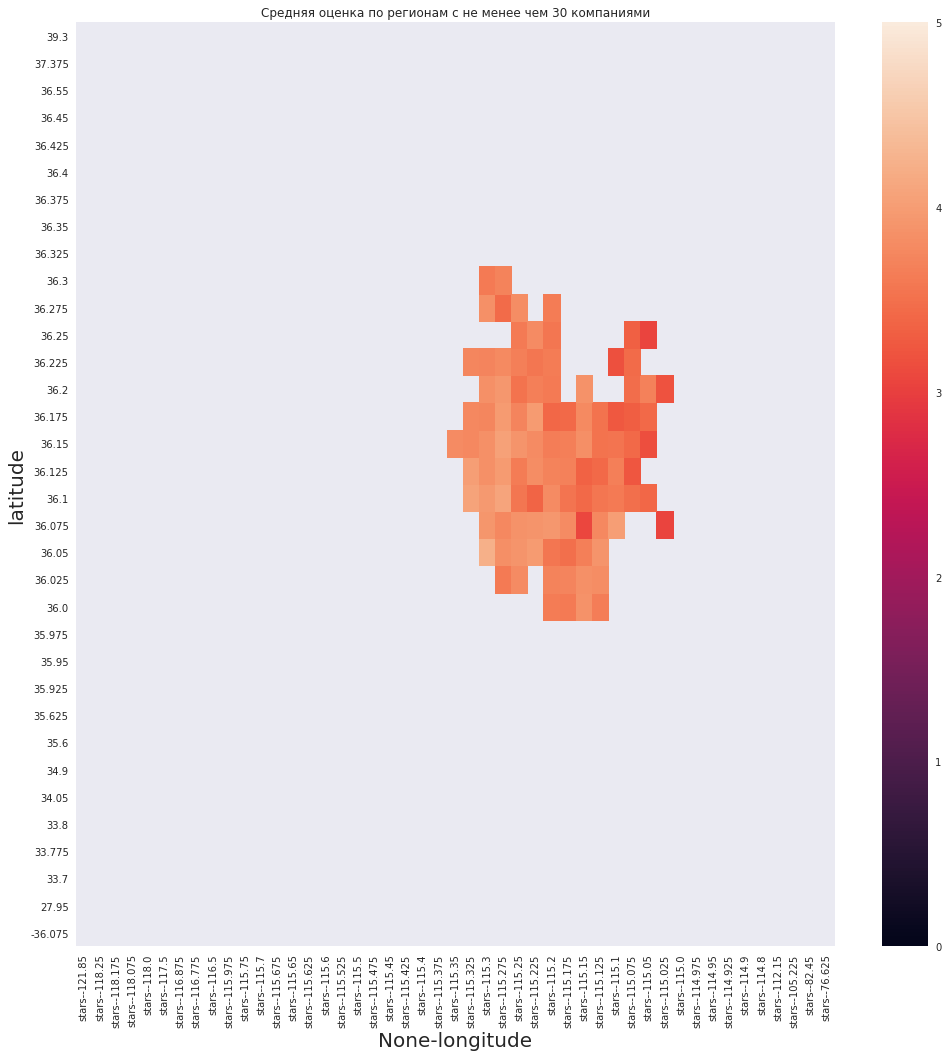

In [17]:
regions_count = pd.pivot_table(reviews_regions, values=['stars'],
                               index=['latitude'], columns=['longitude'], 
                               aggfunc='count')

good_regions = (regions_count >= 30).replace(False, np.NaN) * regions

set_figure()
ax = sns.heatmap(good_regions, vmin=0, vmax=5)
ax.invert_yaxis()

draw_figure('Средняя оценка по регионам c не менее чем 30 компаниями')

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Можно заметить, что регионы с большим числом компаний не сильно отличаются по среднему рейтингу, что нельзя было сказать по предыдущему графику

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

No handles with labels found to put in legend.


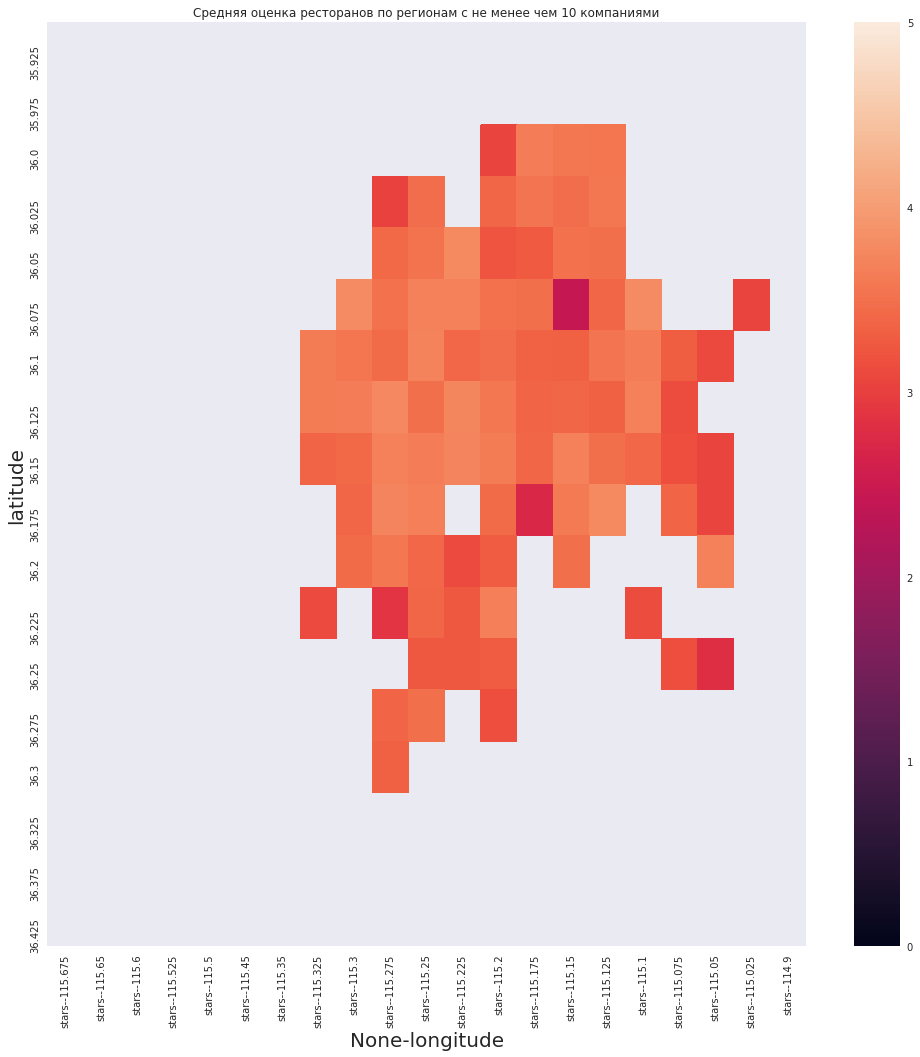

In [30]:
# Из всех заведений оставляем только рестораны
restaurant_reviews = reviews_regions.loc[reviews_regions.categories.str.contains('Restaurant')]
# И из всех ресторанов оставляем только те, у кторых не менее пяти отзывов
restaurant_reviews = restaurant_reviews.loc[reviews_regions['count'] >=5]

# Составляем таблицу регионов с информацией о средней оценке региона
restaurant_regions = pd.pivot_table(restaurant_reviews, values=['stars'],
                               index=['latitude'], columns=['longitude'], 
                               aggfunc=np.mean)
# Составляем таблицу регионов с информацией о количестве отзывов
restaurants_count = pd.pivot_table(restaurant_reviews, values=['stars'],
                               index=['latitude'], columns=['longitude'], 
                               aggfunc='count')
# оставляем только регионы с не менее чем 10 ресторанами
good_regions = (restaurants_count >= 10).replace(False, np.NaN) * restaurant_regions

set_figure()
ax = sns.heatmap(good_regions, vmin=0, vmax=5)
draw_figure('Средняя оценка ресторанов по регионам c не менее чем 10 компаниями')

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Увеличивая размеры отзывов, мы на самом деле избавляемся от рестаранов, которые кажутся выбросами на общем фоне

Кот Василий из таблицы с баллами очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [23]:
# Из всех заведений оставляем только рестораны
restaurant_reviews = reviews_location.loc[reviews_location.categories.str.contains('Restaurant')]
# И из всех ресторанов оставляем только те, у кторых не менее пяти отзывов
restaurant_reviews = restaurant_reviews.loc[reviews_location['count'] >=5]

vasya_best = restaurant_reviews.loc[restaurant_reviews['count'] >= 50].sort_values('stars',
                                                                                   ascending=False).head(10)
vasya_best

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,"""Lip Smacking Foodie Tours""",4.966480,179
Fmij544FE1iOruoxI41kew,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,"""Pepito Shack""",4.907692,65
qw9SyduMZ53KB6GlBQqvZQ,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,"""Bosa Boba Cafe""",4.890909,55
k9b96JXlNewj36ddrce9Jw,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,"""Garden Grill""",4.868132,91
IhNASEZ3XnBHmuuVnWdIwA,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,"""Brew Tea Bar""",4.848069,1165
k5ddmLvAKKw9zSusRPM2cQ,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,"""Poppa Naps BBQ""",4.836538,104
8fFTJBh0RB2EKG53ibiBKw,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,"""Zenaida's Cafe""",4.833333,180
l1GJnB9TJgGgEeI4at1M0A,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,"""El Frescos Cocina Mexicana""",4.816754,191
hFT3HuxVZJb1uYEsYfp-0A,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...,"""Blaqcat Ultra Hookah Lounge""",4.809524,63


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

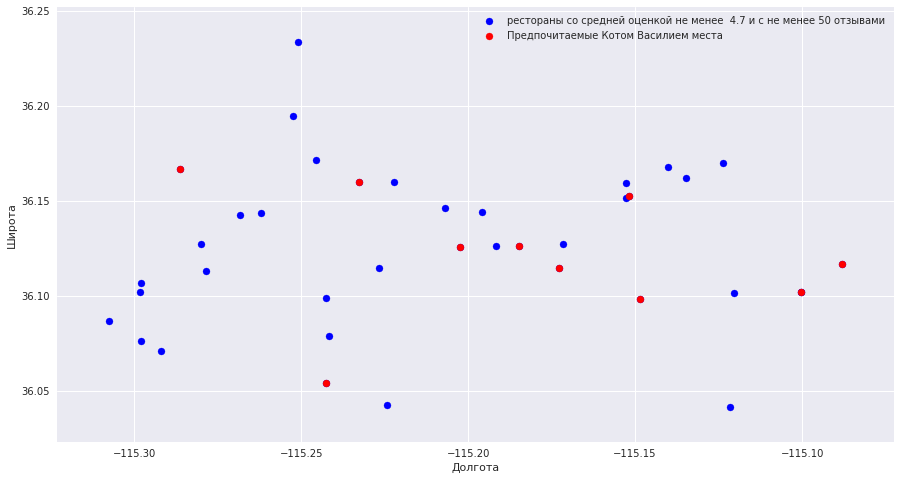

In [29]:
good_restaurants = coords = restaurant_reviews.loc[np.array(restaurant_reviews['count'] >= 50) *
                                            np.array(restaurant_reviews['stars'] >= 4.7)]

plt.figure(figsize=(15, 8))
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.scatter(good_restaurants['longitude'], good_restaurants['latitude'], 
            c='b', label=r'рестораны со средней оценкой не менее  4.7 и с не менее 50 отзывами')
plt.scatter(vasya_best['longitude'], vasya_best['latitude'], 
            c='r', label=r'Предпочитаемые Котом Василием места')

plt.legend()
plt.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий привык ловить только щук (!)

Очень важно следить за выбросами при анализе данных, ведь иногда такие неполные данные могут сместить выводы по задаче. В данном случае мы следили за количеством отзывов при поиске рестаранов с наибольшими оценками

__________________
### Задача 2. Airquality

Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать по ссылке https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality

In [31]:
air_data = pd.read_csv("data/airquality.csv")
air_data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`)

In [32]:
air_data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Так как медиана более устойчива к выбросам, то из того, что медиана и среднее отличаются, можно сделать вывод, что в данных есть небольшие выбросы

Для каждого параметра постройте график ящиков с усами (boxplot), в котором ось $x$ соответствует номеру месяца, а ось $y$ --- значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

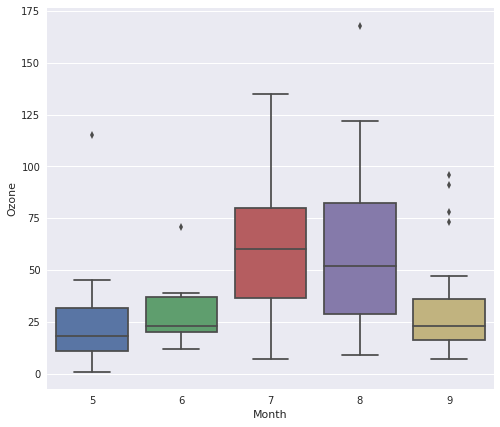

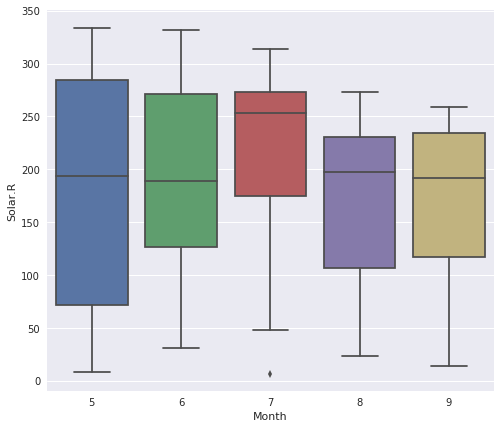

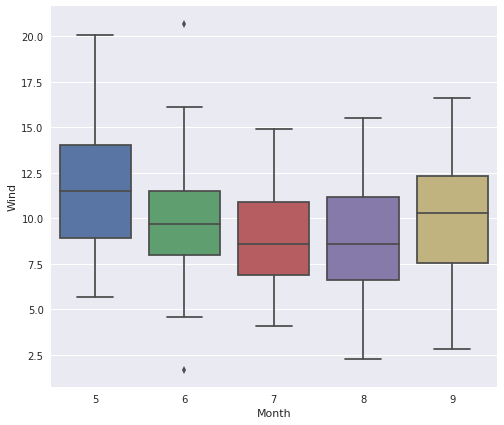

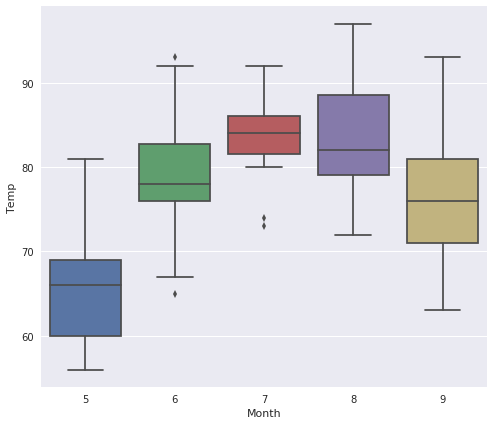

In [33]:
for parametr in air_data.columns[:4]:
    plt.figure(figsize=(8, 7))
    sns.boxplot(x='Month', y=parametr,data=air_data)

Какую информацию показывают ящики с усами? Какие выводы можно сделать в данном случае?

**Ответ:** Ящик с усами в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. По длине усов ящика можно определить степень разброса и асимметрии данных. А с помощью изображённых точек выявить выбросы
Можно заметить, что все данные содержат выбросы, но больше всего их наблюдается у параметра "Ozone"

Для параметра с наибольшим числом наблюдений, признанных выбросами, сравните значения выборочного среднего, выборочной медианы и медианы средних Уолша.

In [34]:
def walsh_median(sample):
    """
    Функция для подсчёта медианы средних Уолша
    
    :param sample: выборка из n элементов
    
    :return: медиана средних Уолша 
    """
    nd_sample = np.array(sample)
    n = len(nd_sample)
    nd_sample = nd_sample.reshape((n, 1))
    
    A = nd_sample @ np.ones((1, n))
    B = (A + A.T) / 2
    return np.median(B[np.triu_indices(n)])

sample = air_data.Ozone

# избавляемся от пустых записей
sample = sample[sample >= 0]

print("""Вот посчитанные статистики для параметра Ozone:\n
      mean\t   = {}\n
      median\t   = {} \n
      walsh median = {}""".format(sample.mean(), sample.median(), walsh_median(sample)))

Вот посчитанные статистики для параметра Ozone:

      mean	   = 42.12931034482759

      median	   = 31.5 

      walsh median = 38.5


При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполено ли это свойство в данном случае?

**Ответ:** В данном случае наблюдения совсем независимыми не являются, так как измерения производились по дням, что довольно часто. Поэтому результат следующего измерения мог формироваться на основе предыдущего.

__________________
### Задача 3. Laplace

Предлагается изучить некоторые свойства распределения Лапласа с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{2} e^{- |x - \theta|}$.

**1.** На отрезке $[-4, 4]$ постройте плотность стандартного нормального распределения и стандартного распределения Лапласа ($\theta = 0$). Не забудьте добавить легенду.

**Решение:**

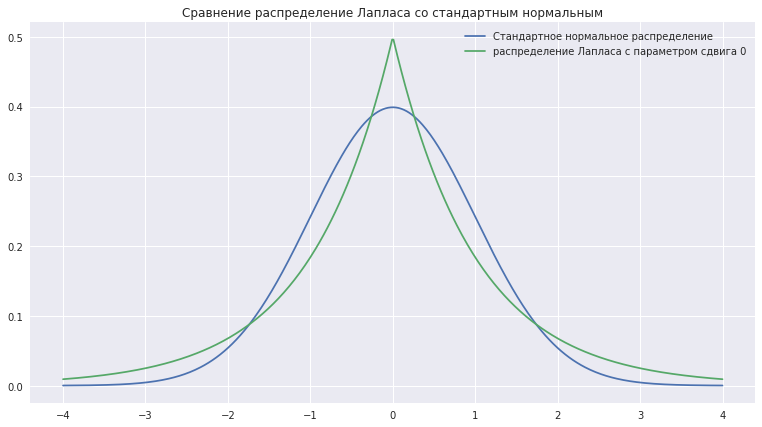

In [6]:
grid = np.linspace(-4, 4, 500)

plt.figure(figsize=(13, 7))
plt.title('Сравнение распределение Лапласа со стандартным нормальным')
plt.plot(grid, sps.norm.pdf(grid), label='Стандартное нормальное распределение')
plt.plot(grid, sps.laplace.pdf(grid), label='распределение Лапласа с параметром сдвига 0')

plt.legend(fontsize=10)
plt.show()

**Вывод:** 
* Распределение лапласса похоже на нормальное тем, что так же симметричное.
* Но плотность распределения Лапласа не так быстро убывает и не является дифференциируемой в нуле

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Лапласа. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Является ли эта функция монотонной? Найдите пределы функции при $\alpha \to+ 0$ и $\alpha \to 1/2 - 0$. Сравните со значениями асимптотической дисперсии для выборочного среднего и выборочной медианы (не забудьте отметить их на графике). Сделайте вывод.

**Решение:**

Из третьей задачи шестого задания известно, что 
* $\sigma_{\alpha}^2 = \frac{2 - 4\alpha + 4\alpha \ln 2\alpha}{(1 - 2\alpha)^2}$
* $\sigma_{\overline{X}}^2 = 2$
* $\sigma_{\widehat{\mu}}^2 = 1$.

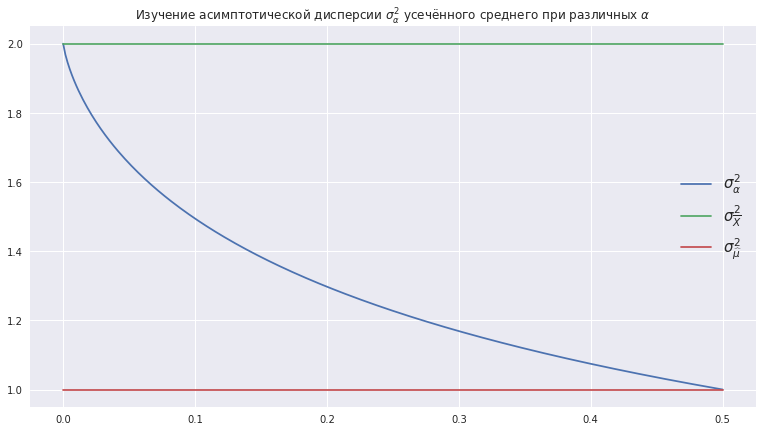

In [7]:
def cut_sigma(alpha):
    return (2 - 4 * alpha + 4 * alpha * np.log(2 * alpha)) / (1 - 2 * alpha) ** 2

eps = 0.00001
N_points = 300
grid = np.linspace(0+eps, 0.5-eps, N_points)

plt.figure(figsize=(13, 7))
plt.title('Изучение асимптотической дисперсии $\\sigma_{\\alpha}^2$ усечённого среднего при различных $\\alpha$')
plt.plot(grid, cut_sigma(grid), label=r'$\sigma_{\alpha}^2$')
plt.plot(grid, np.ones(N_points) * 2, label=r'$\sigma_{\overline{X}}^2$')
plt.plot(grid, np.ones(N_points) * 1, label=r'$\sigma_{\widehat{\mu}}^2$')

plt.legend(fontsize=15)
plt.show()

* $\lim\limits_{\alpha \to +0}\sigma_{\alpha}^2 
 = \lim\limits_{\alpha \to +0}\frac{2 - 4\alpha + 4\alpha \ln 2\alpha}{(1 - 2\alpha)^2} 
 = \lim\limits_{\alpha \to +0}(2 +4\alpha\ln2\alpha) = 2$ -- что есть асимптотическая дисперсия среднего
 
* $\lim\limits_{\alpha \to -0.5}\sigma_{\alpha}^2 
 = \lim\limits_{\alpha \to -0.5}\frac{-4+4\ln2\alpha+4\alpha \frac{2}{2\alpha}}{-4(1-2\alpha)}
 = \lim\limits_{\alpha \to -0.5}\frac{\ln2\alpha}{2\alpha-1}
 = \lim\limits_{\alpha \to -0.5}\frac{1}{2\alpha} = 1$ -- что есть асимптотическая дисперсия выборочной медианы

**Вывод:** Можно заметить по графику, что функция асимптотической дисперсии усечённого среднего является монотонно убывающией, это можно объяснить тем, что оценка становится больше похожей на медиану, чем на среднее с ростом $\alpha$

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Лапласа. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша.

На одном графике изобразите зависимость значений этих оценок от $n$. Настройте видимую область графика по оси y так, чтобы четко была отображена информативная часть графика.  Сделайте вывод.

**Решение: **

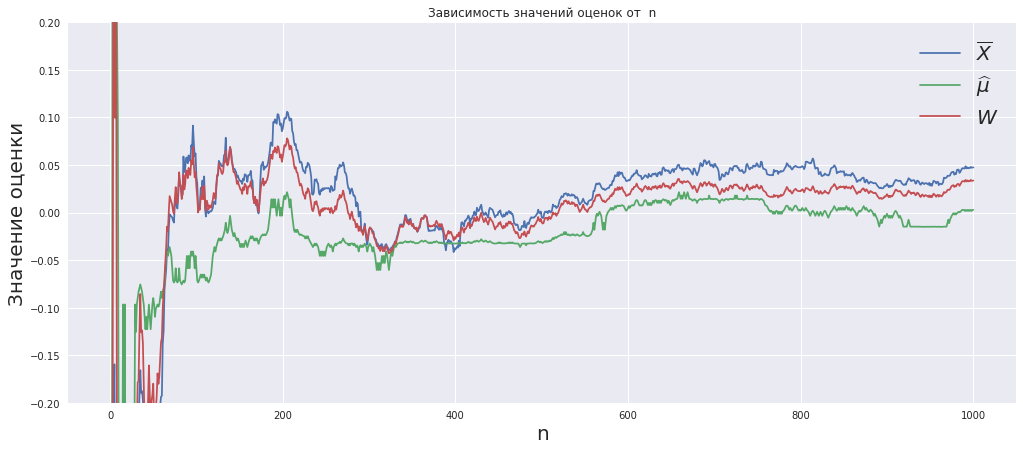

In [29]:
n = 1000
X = sps.laplace.rvs(size=n)
grid = np.arange(1, n + 1)
est_mean = X.cumsum() / grid
est_median = []
est_walsh = []

for i in grid:
    est_median.append(np.median(X[:i]))
    est_walsh.append(walsh_median(X[:i]))

plt.figure(figsize=(17, 7))
plt.ylim(-.2,.2)
plt.title('Зависимость значений оценок от  n')
plt.xlabel('n', fontsize=20)
plt.ylabel('Значение оценки', fontsize=20)

plt.plot(grid, est_mean, label = r'$\overline{X}$')
plt.plot(grid, est_median, label = r'$\widehat{\mu}$')
plt.plot(grid, est_walsh, label = r'$W$')

plt.legend(fontsize=20)
plt.show()

**Вывод:** Можно заметить, что все три оценки стремятся к истинному значению параметра $\theta = 0$. Но у медианы средних Уолша есть преимущество в виде устойчивости к выбросам, которое в этой задаче не проявляется, так как все значения из распределения Лапласа.

__________________
### Задача 4. Gamma-cats (Cauchy)

Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi (1 + (x- \theta)^2)}$.

*Замечание:* Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

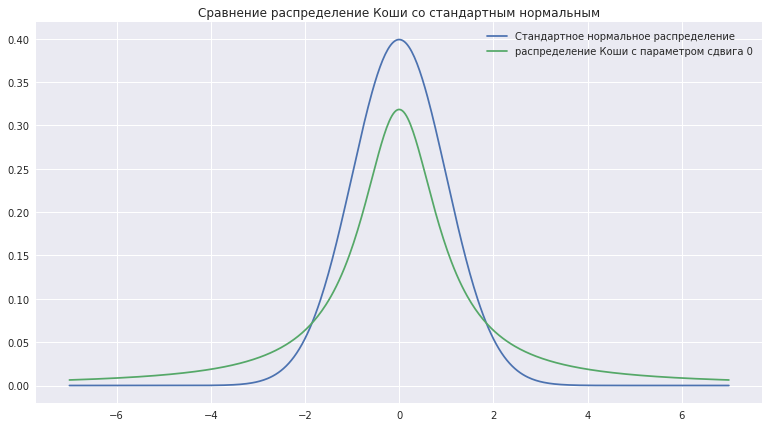

In [30]:
grid = np.linspace(-7, 7, 500)

plt.figure(figsize=(13, 7))
plt.title('Сравнение распределение Коши со стандартным нормальным')
plt.plot(grid, sps.norm.pdf(grid), label='Стандартное нормальное распределение')
plt.plot(grid, sps.cauchy.pdf(grid), label='распределение Коши с параметром сдвига 0')

plt.legend(fontsize=10)
plt.show()

**Вывод:** Их графики плотности симметричны относительно точки, равной параметру сдвига $\theta = 0$. Но стандартное нормальное распределение имеет большуу плотность точек у $\theta$. А распределение Коши более равномерно уменьшается при росте модуля $x$.

**2.** 
Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Коши. Помочь в ее вычислении может теорема, упомянутая на лекциях.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте минимум функции.

**Решение:**

* По теореме с лекции, асимптотическая дисперсия усеченного среднего есть:
$$\sigma_{\alpha}^2 
= \frac{2}{(1 - 2\alpha)^2}(\int\limits_0^{1-\alpha}\frac{x^2}{\pi (1 + x^2)}dx + \alpha u_{1-\alpha}^2)$$

* Где $u_{1-\alpha}$ --- $1-\alpha$ квантиль рампределения Коши, найдём ёё:
$$1-\alpha 
= \int\limits_{-\infty}^{u_{1-\alpha}}\frac{dx}{\pi(1+x^2)} 
= \frac{1}{\pi}\left(arctg(u_{1-\alpha}) + \frac{\pi}{2}\right)$$
$$u_{1-\alpha} = tg(\pi(\frac{1}{2}-\alpha))$$
* Вычислим значение асимптотической дисперсии $\sigma_\alpha^2$:
$$\sigma_{\alpha}^2 
= \frac{2}{(1 - 2\alpha)^2}\left(\frac{tg(\pi(\frac{1}{2} - \alpha)}{\pi} - \frac{1}{2} + \alpha + \alpha \cdot tg^2(\pi(\frac{1}{2}-\alpha))\right)$$

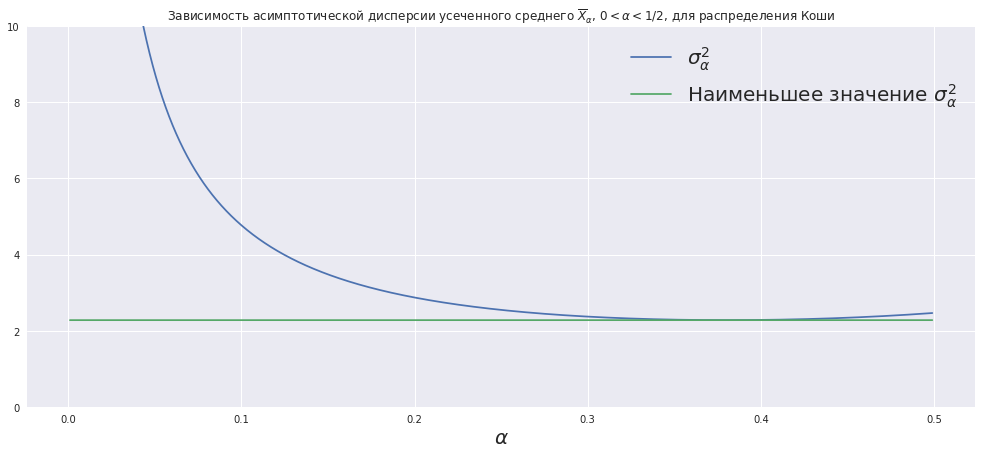

Оптимальное значение alpha = 0.38027042347449147
И минимальная асимптотическая дисперсия = 2.277645070379064


In [75]:
def sigma2(alpha):
    u = np.tan(np.pi * (0.5 - alpha))
    res = u / np.pi - 0.5 + alpha
    res += alpha * u**2
    res /= (1 - 2*alpha)**2 / 2
    return res

eps = 0.001
grid = np.linspace(eps, .5 - eps, 3000)

plt.figure(figsize=(17, 7))
plt.ylim(0, 10)
plt.title(r'Зависимость асимптотической дисперсии усеченного среднего '+
          r'$\overline{X}_{\alpha}$, $0 < \alpha < 1/2$, для распределения Коши')
plt.xlabel(r'$\alpha$', fontsize=20)

Y = sigma2(grid)
opt_sigma = Y.min()
plt.plot(grid, Y, label=r'$\sigma_{\alpha}^2$')
plt.plot(grid, np.ones(len(grid)) * opt_sigma,
         label = r'Наименьшее значение $\sigma^2_{\alpha}$')
plt.legend(fontsize=20)
plt.show()

opt_alpha = grid[np.argmin(Y)]


При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна?

**Ответ: ** 

In [76]:
print("Оптимальное значение alpha = {}".format(opt_alpha))
print("И минимальная асимптотическая дисперсия = {}".format(opt_sigma))

Оптимальное значение alpha = 0.38027042347449147
И минимальная асимптотическая дисперсия = 2.277645070379064


**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;
- $W$ — медиана по всем значениям $Y_{ij} = \frac{X_i + X_j}{2}, 1 \leq i \leq j \leq n$ — медиана средних Уолша;

а также, по каждой из этих оценок, одношаговую оценку.

**Напоминание: ** если $\widehat{\theta}_0$ — асимптотически нормальная оценка, то одношаговая оценка $\widehat{\theta}_1$ вычисляется как $\widehat{\theta}_1 = \widehat{\theta}_0 - \left(l''_X(\widehat{\theta}_0) \right)^{-1} l'_X(\widehat{\theta}_0)$, где $l_X(\theta)$ — логарифмическая функция правдоподобия. Заметим, что обычное выборочное среднее не является асимптотически нормальной оценкой, и оценка, вычисленная по формуле выше, формально не является одношаговой, однако ее все равно требуется посчитать.

На одном графике изобразите зависимость значений этих оценок от $n$. Для каждой оценки $\widehat{\theta}_0$ соответствующая оценка $\widehat{\theta}_1$ должна быть изображена на графике пунктиром тем же цветом, что и $\widehat{\theta}_0$. Сделайте вывод.

**Замечание: ** если некоторые оценки имеют большой разброс, и разница между графиками зависимостей оценок с малыми значениями недостаточно заметна, стоит сделать два графика, на одном из которых будут изображены все оценки, а на втором &mdash; только достаточно хорошие.

**Решение: **

* Посчитаем логарифмическую функцию правдоподобия:
    $$l_X(\theta) = -n\ln \pi - \sum\limits_{i=1}^n\ln(1+(X_i-\theta)^2)$$
* Найдём её производную:
    $$l'_X(\theta) = \sum\limits_{i=1}^n\frac{2(X_i - \theta)}{1+(X_i - \theta)^2}$$
* Найдём вторую производную:
    $$l''_X(\theta) 
    = \sum\limits_{i=1}^n\frac{-2(1+(X_i - \theta)^2) + 4(X_i-\theta)^2}{(1 + (X_i-\theta)^2)^2}
    = 2 \cdot \sum\limits_{i=1}^n\frac{(X_i - \theta)^2 - 1}{(1+(X_i-\theta)^2)^2}$$

In [156]:
def theta1(theta0_val, X):
    l1 = 2 * (X - theta0_val) / (1 + (X - theta0_val)**2)
    l1 = l1.sum()
    l2 = ((X - theta0_val)**2 - 1) / (1 + (X - theta0_val)**2)**2
    l2 = 2 * l2.sum()
    
    res = theta0_val - l1 / l2
    return res

def cut_mean(X):
    n = len(X)
    k = int(n * opt_alpha)
    assert n > 2 * k
    return np.mean(np.sort(X)[k:-k])


/home/alex-kozinov/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/alex-kozinov/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


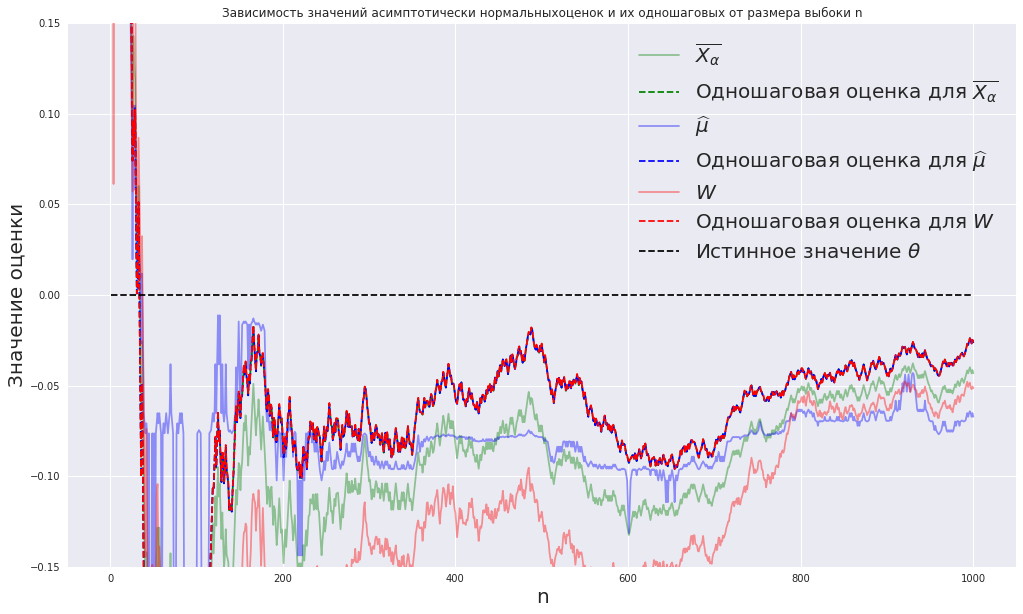

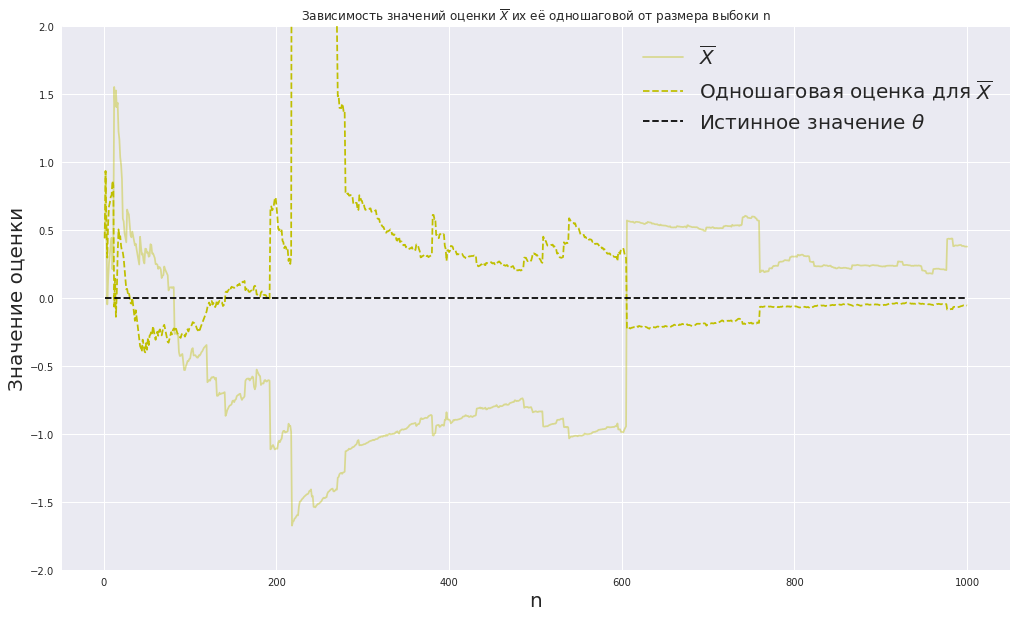

In [160]:
n = 1000
X = sps.cauchy.rvs(size=n)
grid = np.arange(1, n + 1)

zero_estimators = [[] for i in range(4)]
one_step_estimators = [[] for i in range(4)]
func_estimators  = [[r'$\overline{X}$', np.mean], 
                    [r'$\overline{X_{\alpha}}$', cut_mean],
                    [r'$\widehat{\mu}$', np.median],
                    [r'$W$', walsh_median]]
colors = ['y', 'g', 'b', 'r']

for i in grid:
    Xs = X[:i]
    for j in range(4):
        f = func_estimators[j][1]
        theta0_val = f(Xs)
        zero_estimators[j].append(theta0_val)
        one_step_estimators[j].append(theta1(theta0_val, Xs))

# изобразим график для асимптотически нормальных оценок
plt.figure(figsize=(17, 10))
plt.ylim(-.15, .15)
plt.title('Зависимость значений асимптотически нормальных\
оценок и их одношаговых от размера выбоки n')
plt.xlabel('n', fontsize=20)
plt.ylabel('Значение оценки', fontsize=20)

for i in range(1, 4):
    plt.plot(grid, zero_estimators[i], color=colors[i], 
             alpha=.4, label=func_estimators[i][0])
    plt.plot(grid, one_step_estimators[i], color=colors[i], ls='--',
            label=(r'Одношаговая оценка для ' + func_estimators[i][0]))
    
plt.plot(grid, np.zeros(n), color='black', ls='--', 
        label=r'Истинное значение $\theta$')
plt.legend(fontsize=20)
plt.show()

# вынесем среднее на другой график, так как она не а.н.о и масштаб нужен больше
plt.figure(figsize=(17, 10))
plt.ylim(-2, 2)
plt.title(r'Зависимость значений оценки $\overline{X}$ их её одношаговой от размера выбоки n')
plt.xlabel('n', fontsize=20)
plt.ylabel('Значение оценки', fontsize=20)

plt.plot(grid, zero_estimators[0], color=colors[0], 
             alpha=.4, label=func_estimators[0][0])
plt.plot(grid, one_step_estimators[0], color=colors[0], ls='--',
        label=(r'Одношаговая оценка для ' + func_estimators[0][0]))
plt.plot(grid, np.zeros(n), color='black', ls='--', 
        label=r'Истинное значение $\theta$')
plt.legend(fontsize=20)
plt.show()


**Вывод:** 
* Можно заметитить, что одношаговые оценки лучше оценивают параметр с ростом $n$, чем изначальные асимптотически нормальные оценки. И можно заметить, что одношаговые оценкки дают равные значения, что подтверждает то, что они ассимптотически эквивалентны $\theta^*_{\text{ОМП}}$
* Так как оценка $\widehat{\theta} = \overline{X}$ не является асимптотически нормальной, то и она и её 'одношаговая оценка' хаотичным образом сосредоточены у $\theta=0$

__________________
### Задача 5. Baltic macoma (Zero-inflated Poisson)

Пуассоновское распределение обычно используется для моделирования количества событий в некоторый отрезок времени или для моделирования количества объектов в некоторой области в предположении, что события или объекты появляются случайно и независимо. В курсе случайных процессов мы изучим пуассоновские процессы и поймем их связь с экспоненциальным распределением.

Пуассоновское распределение, завышенное в нуле (zero-inflated Poisson distribution), используется для моделирования случаев, в которых наблюдается завышенное содержание нулевых исходов. Например, число страховых исков в рамках населения будет иметь завышенное в нуле распределение из-за наличия тех людей, которые не оформили страховку.

Рассмотрим данные о колличествах балтийской макомы -- вид морских двустворчатых моллюсков из семейства теллинид, распространенного в северной части Атлантического и Тихого океана. В результате проведенных исследований оказалось, что во многих локациях численность видов равна нулю, поэтому стоит ожидать, что данные имеют пуассоновское распределение, завышенное в нуле.

Загрузите данные из файла `macoma.csv` и выберите столбец `macoma`. Постройте по данным гистограмму.

*Внимание!* Поскольку распределение дискретно, бины гистограммы должны соответствовать значениям величины. Для этого воспользуйтесь функцией `plt.hist(sample, range=(0, N), bins=N)`.

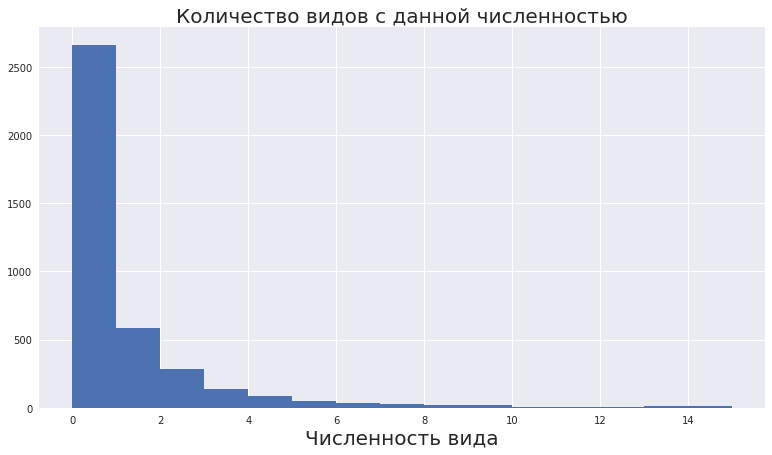

In [168]:
data = pd.read_csv("data/macoma.csv")
macoma = data.macoma
N = 15

plt.figure(figsize=(13, 7))
plt.title('Количество видов с данной численностью', fontsize=20)
plt.xlabel('Численность вида', fontsize=20)
plt.hist(macoma, range=(0, N), bins=N)
plt.show()

Из теоретического домашнего задания вам известен метод поиска оценки максимального правдоподобия параметров распределения. Выпишите готовые формулы:

**Ответ:** <...>

Реализуйте метод для выданных данных. Постройте графики траекторий значений параметров в зависимости от номера итерации метода.

In [ ]:
<...>

Чтобы убедиться, что вы нашли правильное решение, посчитайте значения логарифмической функции правдоподобия по двумерной сетке значений параметров $(\varepsilon, \lambda)$ и найдите максимум, используя функцию `cool_argmax` из предыдущего задания. Сравните его со значением, найденным ранее.

<...>

Распределение с подобранными параметрами сравните с гистограммой. На какой итерации визуально приближение получается наилучшим?

In [ ]:
<...>

**Ответ:** <...>

Почему при увеличении количества итерации получается плохое приближение? Предложите способ исправить этот недочет и реализуйте его.

**Описание решения:** <...>

**Реализация решения:**

In [ ]:
<...>

**Ответ (значения оценок параметров):** <...>

**Вывод:** <...>

__________________
### Задача 6. Image Denoising

В качестве параллельного практического задания вам предлагаются конкурсы на Kaggle по восстановлению зашумленных фотографий семинаристов. Перечислите недостатки предлагаемых подходов и способа оценки качества восстановленного изображения.

**Ответ:** <...>